### 다음 질문
    - 시황분석에 포함되지 않은 날들에 대한 해석 여부
      - ['2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31',
               '2008-06-30', '2008-07-31', '2011-04-30', '2011-05-31',
               '2011-06-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30']

### 시황분석에 포함되지 않은 날들에 대한 이해
- 2008년: 미국발 금융위기
- 2011년: 블랙 먼데이
- 2014년: 미국 셰일가스 -> 미국 세계 최대 산유국 최초 등극
- 2015년: 국제유가 이슈
- 2018년: 미국의 기준금리 인상 기조 + 경기둔화 가능성 확산 + 채권 금리 급등 
- 2021 하반기 & 2022년 상반기: 인플레이션 + 미국 기준금리 인상 + 우크라이나 전쟁 

### 해석: 급변하는 시황인 경우를 놓치는 것 같음
### 개선방향: 시장의 반응을 포착하는 지수를 포해보자

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import yfinance as yf
from fredapi import Fred

fred_key = '78b31c929aa00cef888d17a4c63cb823'
fred = Fred(api_key=fred_key)

import sys
sys.path.append("/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/quant/Quant-Project/quant")
from backtest.metric import *

In [3]:
date_strings = [
                '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31',
                '2008-06-30', '2008-07-31', '2011-04-30', '2011-05-31',
                '2011-06-30', '2013-12-31', '2014-01-31', '2014-02-28',
                '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
                '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
                '2015-06-30', '2015-07-31', '2018-06-30', '2018-07-31',
                '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
                '2018-12-31', '2021-08-31', '2021-09-30', '2021-10-31',
                '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
                '2022-03-31', '2022-04-30'
                ]

missing_dates = pd.to_datetime(date_strings)

In [205]:
#high_yield = fred.get_series('BAMLH0A0HYM2')
#st_louis = fred.get_series('STLFSI3')
sahm_rule = fred.get_series('SAHMREALTIME')
#vix = fred.get_series('VIXCLS')

In [235]:
sahm_rule = pd.DataFrame(sahm_rule)
sahm_rule = sahm_rule.rename(columns={0:'sahm'})
#sahm_rule.isna().sum()

sahm_rule['3m'] = sahm_rule.sahm.rolling(window=3).mean()
sahm_rule['min'] = sahm_rule.sahm.rolling(window=12).min()
sahm_rule['recession'] = (sahm_rule['3m'] - sahm_rule['min'])
sahm_rule['recession'] = (sahm_rule['recession'] >= 0.5) * 1
sahm_rule#.loc['2015']

,sahm,3m,min,recession
1959-12-01,0.77,NaN,NaN,0
1960-01-01,0.50,NaN,NaN,0
1960-02-01,0.13,0.466667,NaN,0
1960-03-01,0.10,0.243333,NaN,0
1960-04-01,0.03,0.086667,NaN,0
...,...,...,...,...
2022-09-01,0.00,0.000000,-0.33,0
2022-10-01,0.07,0.033333,-0.33,0
2022-11-01,0.07,0.046667,-0.27,0
2022-12-01,0.03,0.056667,-0.20,0


In [214]:
recession_series = (sahm_rule['recession'].loc['2008':] == 1) * 1
recession_series = recession_series[recession_series > 0].reset_index()

missing_dates = pd.DataFrame(missing_dates)
missing_dates = missing_dates.rename(columns={0:'index'})

In [215]:
def get_year_month(x):
    return "{}-{:02d}".format(x.year, x.month)

recession_series['year_month'] = recession_series['index'].apply(get_year_month)
recession_series = recession_series.set_index(recession_series['year_month'])
missing_dates['year_month'] = missing_dates['index'].apply(get_year_month)
missing_dates = missing_dates.set_index(missing_dates['year_month'])

In [216]:
missing_dates

,index,year_month
year_month,,
2008-02,2008-02-29,2008-02
2008-03,2008-03-31,2008-03
2008-04,2008-04-30,2008-04
2008-05,2008-05-31,2008-05
2008-06,2008-06-30,2008-06
2008-07,2008-07-31,2008-07
2011-04,2011-04-30,2011-04
2011-05,2011-05-31,2011-05
2011-06,2011-06-30,2011-06


In [217]:
missing_dates.index.difference(recession_series.index)
#missing_dates['year_month'] - recession_series['year_month']

Index(['2008-02', '2008-03', '2008-04', '2011-04', '2011-05', '2011-06',
       '2013-12', '2014-01', '2014-02', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03', '2022-04'],
      dtype='object', name='year_month')

### 결론
- 경기침체 국면 추가해도 아직 모든 월은 포함이 안되는구나..
- 실업률, 장단기금리채를 추가하는 방법 고안해보자


### 다음 진행
- 경기침체 지표를 사용해서 VIX 투자방법 고안해보자

In [283]:
fed_rate = fred.get_series('FEDFUNDS')
fed_rate = pd.DataFrame(fed_rate)
fed_rate = fed_rate.rename(columns={0:'rate_change'})
fr_change = fed_rate.pct_change().loc['2000':]
fr_change['tapering'] = (fr_change['rate_change'] < 0) * 1
fr_change

,rate_change,tapering
2000-01-01,0.028302,0
2000-02-01,0.051376,0
2000-03-01,0.020942,0
2000-04-01,0.029060,0
2000-05-01,0.041528,0
...,...,...
2022-09-01,0.098712,0
2022-10-01,0.203125,0
2022-11-01,0.227273,0
2022-12-01,0.084656,0


In [285]:
sahm_rule = fred.get_series('SAHMREALTIME')
sahm_rule = pd.DataFrame(sahm_rule)
sahm_rule = sahm_rule.rename(columns={0:'sahm'})

sahm_rule['3m'] = sahm_rule.sahm.pct_change(3)
sahm_rule['min'] = sahm_rule.sahm.rolling(window=12).min()
sahm_rule['recession'] = (sahm_rule['3m'] - sahm_rule['min'])
sahm_rule['recession'] = (sahm_rule['recession'] >= 0.5) * 1
sahm_rule.replace([float('inf'), -float('inf')], 0, inplace=True)
sahm_rule = sahm_rule.loc['2000':]

,recession,tapering
2000-01-01,0,0
2000-02-01,0,0
2000-03-01,0,0
2000-04-01,0,0
2000-05-01,0,0
...,...,...
2022-09-01,0,0
2022-10-01,0,0
2022-11-01,1,0
2022-12-01,1,0


<AxesSubplot: >

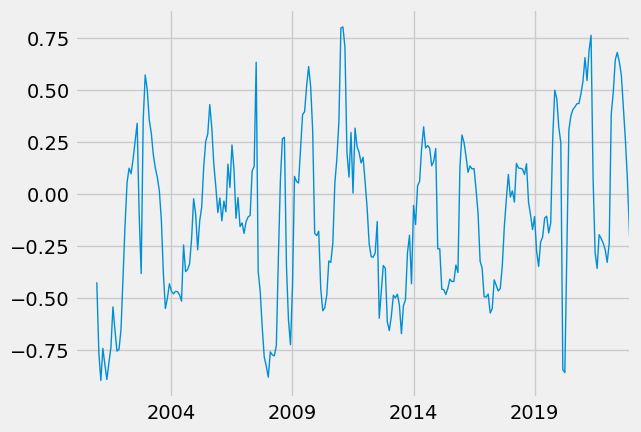

In [329]:
fr_change.rate_change.rolling(12).corr(sahm_rule.sahm).plot(kind='line', lw=1)

In [290]:
vix_signal = pd.concat([sahm_rule['recession'], fr_change['tapering']], axis=1)
vix_signal['signal'] = ((vix_signal['recession'] - vix_signal['tapering']) == 1 ) * 1

DatetimeIndex(['2003-08-01', '2004-09-01', '2006-03-01', '2006-07-01',
               '2007-07-01', '2008-06-01', '2008-07-01', '2010-11-01',
               '2011-08-01', '2014-05-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-06-01', '2017-02-01', '2017-10-01',
               '2018-09-01', '2019-03-01', '2019-07-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2021-07-01', '2021-10-01',
               '2021-11-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq=None)

In [302]:
test_df = vix_signal[vix_signal.signal == 1].reset_index()

test_df['year_month'] = test_df['index'].apply(get_year_month)
teste_df = test_df.set_index(test_df['year_month'])

In [298]:
vix = fred.get_series('VIXCLS')

<AxesSubplot: >

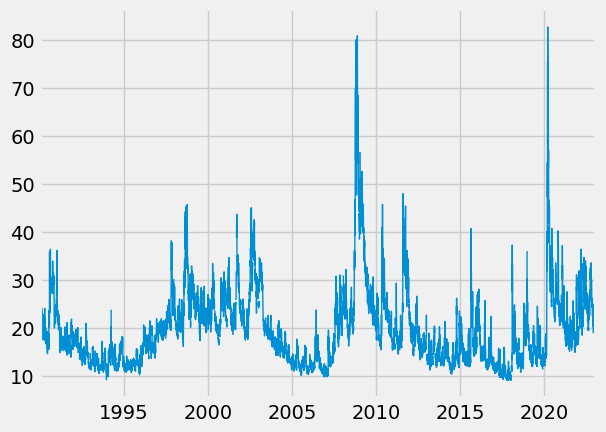

In [299]:
vix.plot(lw=1)

In [300]:
(1+vix.loc['2008':].pct_change()).cumprod()

2008-01-01         NaN
2008-01-02         NaN
2008-01-03    0.970652
2008-01-04    1.033233
2008-01-07    1.026759
                ...   
2023-01-31    0.837290
2023-02-01    0.771256
2023-02-02    0.808373
2023-02-03    0.791109
2023-02-06    0.838584
Length: 3940, dtype: float64

<AxesSubplot: >

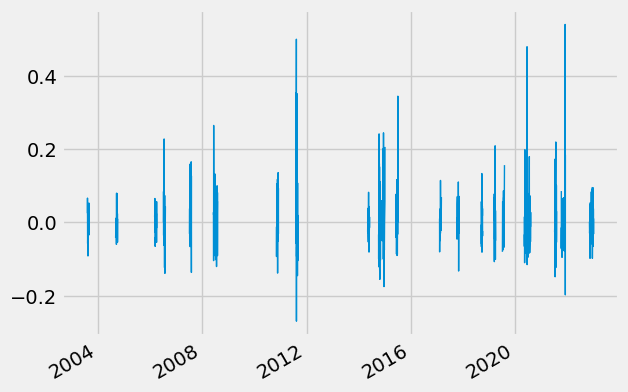

In [303]:
rets_list = []

for date in test_df['year_month']:
    #print(date)
    series = vix.loc[date].pct_change()
    rets_list.append(series)
    #print(series.iloc[-1])

vix_rets = pd.concat(rets_list)
vix_rets.plot(lw=1)

<AxesSubplot: >

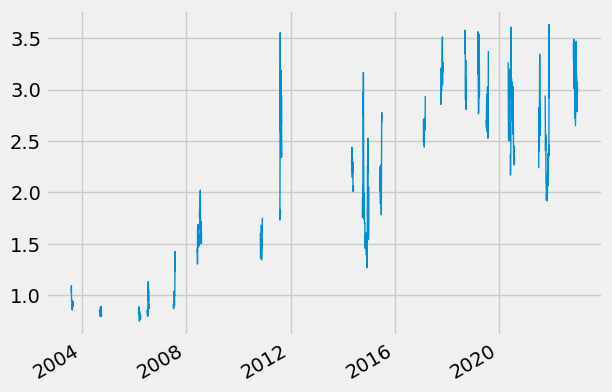

In [305]:
(1+vix_rets).cumprod().plot(lw=1)

### total regime이랑 합쳐서 보자

In [306]:
vix_rets.resample('M').last()

2003-08-31    0.008117
2003-09-30         NaN
2003-10-31         NaN
2003-11-30         NaN
2003-12-31         NaN
                ...   
2022-08-31         NaN
2022-09-30         NaN
2022-10-31         NaN
2022-11-30   -0.059845
2022-12-31    0.010728
Freq: M, Length: 233, dtype: float64

In [307]:
month_rets_dict = {}

for date in test_df['year_month']:
    #print(date)
    series = vix.loc[date].dropna()#.pct_change()
    #print(series.iloc[0])
    #print(series.iloc[-1])
    month_rets = (series.iloc[-1] - series.iloc[0]) / series.iloc[0]
    month_end = vix.loc[date].resample('M').last().index
    month_end = month_end[-1]
    
    month_rets_dict[month_end] = month_rets
    #print(month_rets_dict)
    #month_rets_list.append(month_rets)
    #print(month_rets)
    #break

month_rets_dict

{Timestamp('2003-08-31 00:00:00', freq='M'): -0.10216867469879523,
 Timestamp('2004-09-30 00:00:00', freq='M'): -0.10529845741113349,
 Timestamp('2006-03-31 00:00:00', freq='M'): -0.012998266897746845,
 Timestamp('2006-07-31 00:00:00', freq='M'): 0.14559386973180066,
 Timestamp('2007-07-31 00:00:00', freq='M'): 0.5272727272727272,
 Timestamp('2008-06-30 00:00:00', freq='M'): 0.20776601109430162,
 Timestamp('2008-07-31 00:00:00', freq='M'): -0.030021141649048514,
 Timestamp('2010-11-30 00:00:00', freq='M'): 0.07833256985799363,
 Timestamp('2011-08-31 00:00:00', freq='M'): 0.3364327979712595,
 Timestamp('2014-05-31 00:00:00', freq='M'): -0.13962264150943393,
 Timestamp('2014-10-31 00:00:00', freq='M'): -0.1603830041891084,
 Timestamp('2014-11-30 00:00:00', freq='M'): -0.09504412763068569,
 Timestamp('2014-12-31 00:00:00', freq='M'): 0.3435969209237229,
 Timestamp('2015-06-30 00:00:00', freq='M'): 0.3049391553328561,
 Timestamp('2017-02-28 00:00:00', freq='M'): 0.09398814563928869,
 Times

In [315]:
recession_regime = pd.DataFrame(month_rets_dict.values(), index=month_rets_dict.keys())
recession_regime

,0
2003-08-31,-0.102169
2004-09-30,-0.105298
2006-03-31,-0.012998
2006-07-31,0.145594
2007-07-31,0.527273
2008-06-30,0.207766
2008-07-31,-0.030021
2010-11-30,0.078333
2011-08-31,0.336433
2014-05-31,-0.139623


In [319]:
total_regime = pd.read_csv('./total_regime.csv', index_col=0)
total_regime.index = pd.to_datetime(total_regime.index)

In [322]:
tr_rc_regime = pd.concat([total_regime,recession_regime], axis=1).fillna(0)
tr_rc_regime.columns = ['tr', 'rc']
tr_rc_regime

,tr,rc
2003-08-31,0.000000,-0.102169
2004-09-30,0.000000,-0.105298
2006-03-31,0.000000,-0.012998
2006-07-31,0.000000,0.145594
2007-07-31,0.000000,0.527273
...,...,...
2022-08-31,0.028985,0.000000
2022-09-30,0.035726,0.000000
2022-10-31,-0.003980,0.000000
2022-11-30,-0.047286,-0.202635


In [324]:
Metric(portfolio=(1+tr_rc_regime['tr']).cumprod(), freq='month').print_report()
#Metric(portfolio=(1+tr_rc_regime['rc']).cumprod(), freq='month').print_report()

Annualized Return: 18.05%
Annualized Volatility: 12.27%
Skewness: 0.57
Kurtosis: 3.12
Max Drawdown: -17.13%
Max Drawdown Duration: 487 days
Annualized Sharp Ratio: 1.15
Annualized Sortino Ratio: -0.41
Annualized Calmar Ratio: 1.05
Annualized VaR: -0.07
Annualized VaR Ratio: 0.20
Annualized CVaR: -0.11
Annualized CVaR Ratio: 0.14
Annualized hit Ratio: 0.70
Annualized GtP Ratio: 1.63


In [32]:
#(1+pd.concat(rets_list).loc['2015-10']).cumprod()

recession_series
rets_list = []
for date in recession_series['year_month']:
    print(date)
    series = vix.loc[date].pct_change()
    print((1+series).cumprod().iloc[-1])
    

2008-01
1.1307725507121271
2008-02
1.1049125728559532
2008-05
0.9443855932203393
2008-06
1.2077660110943016
2008-07
0.9699788583509517
2010-11
1.0783325698579935
2010-12
0.8309925093632963
2011-07
1.5910522999369885
2011-08
1.3364327979712594
2013-08
1.314528593508501
2014-01
1.2937456078706957
2014-05
0.8603773584905658
2014-10
0.8396169958108916
2014-11
0.904955872369314
2014-12
1.3435969209237226
2015-06
1.3049391553328562
2015-10
0.6682926829268292
2017-02
1.0939881456392886
2017-10
1.0772486772486771
2018-09
0.9209726443768996
2019-03
1.0103168754605747
2019-07
1.1465149359886204
2020-03
1.6020347097546381
2020-04
0.5984928145811426
2020-05
0.7397149771443935
2020-06
1.0779312787814384
2020-07
0.8546470999301186
2021-07
1.1782945736434107
2021-08
0.8468653648509765
2021-09
1.4363749224084417
2021-10
0.7687943262411346
2021-11
1.6569165143205373
2022-11
0.7973653622626888
2022-12
1.0922379032258067


In [19]:
st_louis = fred.get_series('STLFSI3')

In [20]:
st_louis = st_louis[st_louis > 1].loc['2008':]
st_louis.loc['2008']

2008-01-04    1.7266
2008-01-11    1.1174
2008-01-18    1.0150
2008-01-25    1.6605
2008-02-08    1.4312
2008-02-15    1.0552
2008-02-29    1.2676
2008-03-07    2.3269
2008-03-14    1.8407
2008-03-21    2.3138
2008-03-28    1.2384
2008-04-04    1.3807
2008-04-11    1.5630
2008-04-18    1.4092
2008-04-25    1.1736
2008-05-02    1.0326
2008-05-09    1.0028
2008-06-06    1.1516
2008-06-27    1.5868
2008-07-04    1.6493
2008-07-11    1.5937
2008-07-18    1.3553
2008-08-01    1.4687
2008-08-08    1.2974
2008-08-15    1.3107
2008-08-22    1.6020
2008-08-29    1.2847
2008-09-05    1.6053
2008-09-12    1.7003
2008-09-19    3.7698
2008-09-26    3.5997
2008-10-03    6.3616
2008-10-10    8.2572
2008-10-17    7.8035
2008-10-24    7.0830
2008-10-31    6.6462
2008-11-07    5.6342
2008-11-14    5.4936
2008-11-21    7.3717
2008-11-28    6.3678
2008-12-05    6.8007
2008-12-12    5.9717
2008-12-19    5.8874
2008-12-26    4.4752
dtype: float64